# The other epidemic: women killed by an intimate partner or ex-partner in domestic homicides
## A case study of Spain since 2003, when national data started to be collected


I have always been interested in researching the history of domestic violence in my home country (total fatal victims over time, trends, number of police complaints, etc.) as well as of vicarious violence, more specifically (this is the number of children killed either by their fathers or their mum's current romantic or ex-romantic partner). 

### My first step was to download and save all the pdfs with official data from the Ministry of Equality in Spain. At first, I didn't find any better file (excel, csv...) of official data, so I used #pathlib to automate the download

In [1]:
import requests
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

In [2]:
# we read our pdfs without spaces thanks to .splitlines()
# urls = open("files.txt").read().splitlines()

In [3]:
# we create a new folder for all our files
# download_dir =Path('files')
# download_dir.mkdir(parents=True, exist_ok=True)

In [4]:
#for url in tqdm(urls):
    # put out the filename and request that url
#     filename = Path(url).name
#     response = requests.get(url)
#     # save it to your computer with the same filename
#     download_dir.joinpath(filename).write_bytes(response.content)

### After, I was actually able to download official data on domestic violence from the  National Institute of Statistics (INE, in Spanish), which allowed me to create different .csv files with the information I was interested

In [5]:
df = pd.read_csv('export.csv')
df.head()

,year,Denuncia agresor,autonomous_community,age,women_killed
0,Año 2003,No consta denuncia,Andalucía,21-30 años,3.0
1,Año 2003,No consta denuncia,Andalucía,31-40 años,4.0
2,Año 2003,No consta denuncia,Andalucía,41-50 años,3.0
3,Año 2003,No consta denuncia,Andalucía,71-84 años,2.0
4,Año 2003,No consta denuncia,Andalucía,>=85 años,1.0


In [6]:
# I check I have all the Spanish autonomous communities on my data
df['autonomous_community'].value_counts()

Andalucía                     124
Cataluña                      105
Comunitat Valenciana          102
Comunidad de Madrid            87
Canarias                       60
Galicia                        54
Castilla y León                46
Castilla - La Mancha           42
País Vasco                     36
Illes Balears                  32
Región de Murcia               32
Principado de Asturias         25
Aragón                         25
Comunidad Foral de Navarra     14
Cantabria                      10
Extremadura                    10
La Rioja                        6
Melilla                         5
Ceuta                           2
Name: autonomous_community, dtype: int64

In [7]:
## clean a bit the data and traslated into English
df['year'] = df['year'].str.replace('Año', '').astype(int)
df['women_killed'] = df['women_killed'].astype(int)
df['age'] = df['age'].str.replace('años', '').replace('No consta', 'unknown')

In [8]:
df.head()

,year,Denuncia agresor,autonomous_community,age,women_killed
0,2003,No consta denuncia,Andalucía,21-30,3
1,2003,No consta denuncia,Andalucía,31-40,4
2,2003,No consta denuncia,Andalucía,41-50,3
3,2003,No consta denuncia,Andalucía,71-84,2
4,2003,No consta denuncia,Andalucía,>=85,1


In [9]:
#df.to_csv("pre_complaint.csv", index=False)

In [10]:
# groupby by year and total number of women killed by autonomous community (similar to USA states)
df =df.groupby(['year', 'autonomous_community']).women_killed.sum().to_frame().reset_index()
df.head()

,year,autonomous_community,women_killed
0,2003,Andalucía,13
1,2003,Aragón,2
2,2003,Canarias,6
3,2003,Cantabria,1
4,2003,Castilla - La Mancha,2


In [11]:
df.women_killed.sum()

1129

### We want to get another dataframe with the total population per autonomous community, so we are able to calculate the number of homicides per 100,000 women. We download the data  the INE

In [12]:
total_popu = pd.read_csv('total_population.csv')
total_popu.head()

,Comunidades,Año,Total
0,ANDALUCÍA,2021,4.299.068
1,ANDALUCÍA,2020,4.293.806
2,ANDALUCÍA,2019,4.267.073
3,ANDALUCÍA,2018,4.250.510
4,ANDALUCÍA,2017,4.245.985


In [13]:
# traslate values into English
total_popu['Comunidades'] = total_popu['Comunidades'].replace({'ANDALUCÍA':'Andalucía', 'EXTREMADURA':'Extremadura', 'CEUTA':'Ceuta', 'RIOJA, LA':'La Rioja', 'PAÍS VASCO':'País Vasco', 'NAVARRA, COMUNIDAD FORAL DE':'Comunidad Foral de Navarra', 'MURCIA, REGIÓN DE':'Región de Murcia', 'MADRID, COMUNIDAD DE':'Comunidad de Madrid', 'GALICIA':'Galicia',
                                                               'COMUNITAT VALENCIANA':'Comunitat Valenciana', 'ARAGÓN':'Aragón', 'CATALUÑA':'Cataluña', 'CASTILLA - LA MANCHA':'Castilla - La Mancha', 'CASTILLA Y LEÓN':'Castilla y León', 'CANTABRIA':'Cantabria','CANARIAS':'Canarias','BALEARS, ILLES':'Illes Balears', 'ASTURIAS, PRINCIPADO DE':'Principado de Asturias', 'MELILLA':'Melilla'})


In [14]:
total_popu = total_popu.rename(columns={'Comunidades': 'autonomous_community', 'Año': 'year', 'Total': 'female_population'})

In [15]:
# convert total population into integer
total_popu.female_population = total_popu.female_population.str.replace(".", "").astype(int)

/var/folders/mm/7r7tnzn90cxcfg9kflk_94qc0000gn/T/ipykernel_10921/2999102329.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_popu.female_population = total_popu.female_population.str.replace(".", "").astype(int)


In [16]:
# group by year and territory
total_popu.groupby(['year', 'autonomous_community']).female_population.sum().to_frame().reset_index()

,year,autonomous_community,female_population
0,2003,Andalucía,3849478
1,2003,Aragón,619880
2,2003,Canarias,944709
3,2003,Cantabria,281381
4,2003,Castilla - La Mancha,908125
...,...,...,...
356,2021,La Rioja,161973
357,2021,Melilla,42658
358,2021,País Vasco,1137608
359,2021,Principado de Asturias,529127


In [17]:
# merge both dataframes: women killed and total population
df_merged = df.merge(total_popu, how='inner',on=(['year', 'autonomous_community']))
df_merged.head()

,year,autonomous_community,women_killed,female_population
0,2003,Andalucía,13,3849478
1,2003,Aragón,2,619880
2,2003,Canarias,6,944709
3,2003,Cantabria,1,281381
4,2003,Castilla - La Mancha,2,908125


In [18]:
# calculate percentage of women killed in each territory by 100,000 female inhabitants
df_merged['homicide_rate_100k'] = round((df_merged.women_killed / df_merged.female_population) * 100000, 3)
df_merged.head()

,year,autonomous_community,women_killed,female_population,homicide_rate_100k
0,2003,Andalucía,13,3849478,0.338
1,2003,Aragón,2,619880,0.323
2,2003,Canarias,6,944709,0.635
3,2003,Cantabria,1,281381,0.355
4,2003,Castilla - La Mancha,2,908125,0.220


In [19]:
df_mean_rate =df_merged.groupby(['autonomous_community']).homicide_rate_100k.mean().round(3).to_frame().reset_index()
df_mean_rate.head(20).sort_values(by='homicide_rate_100k')

,autonomous_community,homicide_rate_100k
9,Comunidad de Madrid,0.187
11,Extremadura,0.200
16,País Vasco,0.201
5,Castilla y León,0.242
6,Cataluña,0.251
12,Galicia,0.257
4,Castilla - La Mancha,0.283
0,Andalucía,0.287
10,Comunitat Valenciana,0.304
1,Aragón,0.305


In [20]:
df_mean_rate.to_csv("rate_homicide_territories.csv", index=False)

In [21]:
df_merged.to_csv("final_output.csv", index=False)

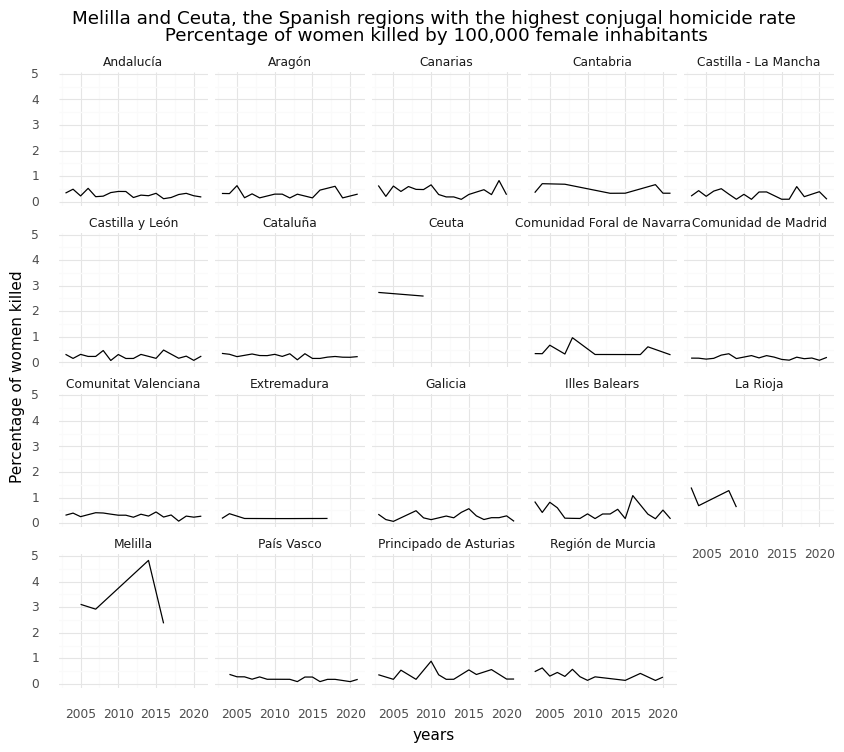

<ggplot: (295708357)>

In [22]:
# some initial analysis
from plotnine import *
display(
    ggplot(df_merged,             
        aes('year', 'homicide_rate_100k'))
        + geom_line() 
        + theme_minimal()
        + theme(figure_size=(10, 8))
        + facet_wrap('autonomous_community')
        + labs(
            title = "Melilla and Ceuta, the Spanish regions with the highest conjugal homicide rate\n Percentage of women killed by 100,000 female inhabitants",
            y = "Percentage of women killed",
            x = "years"
        )
) 

In [23]:
# we create a subset with only Ceuta a Melilla to plot these territories separately
worse_regions =df_merged[df_merged.autonomous_community.isin(['Ceuta', 'Melilla'])]
worse_regions

,year,autonomous_community,women_killed,female_population,homicide_rate_100k
7,2003,Ceuta,1,36536,2.737
44,2005,Melilla,1,32166,3.109
73,2007,Melilla,1,34232,2.921
97,2009,Ceuta,1,38556,2.594
169,2014,Melilla,2,41434,4.827
197,2016,Melilla,1,42258,2.366


In [24]:
annotations =df_merged[df_merged.autonomous_community.isin(['Ceuta', 'Melilla'])]
annotations=annotations[annotations.year.isin([2003, 2005])]
annotations

,year,autonomous_community,women_killed,female_population,homicide_rate_100k
7,2003,Ceuta,1,36536,2.737
44,2005,Melilla,1,32166,3.109


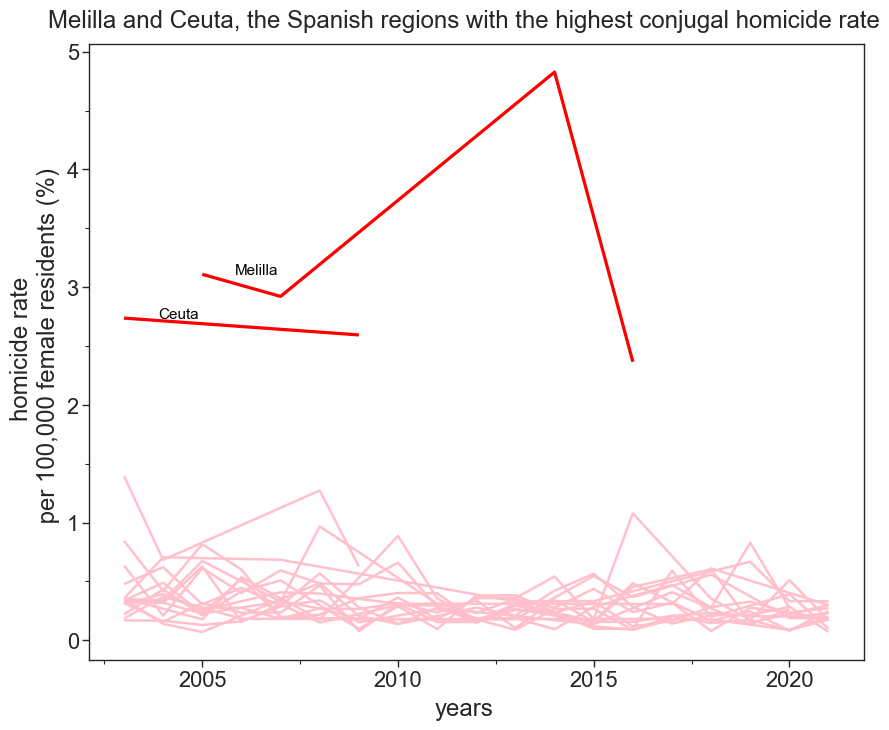

<ggplot: (309409549)>

In [25]:
(
    ggplot() + 
        geom_line(df_merged, aes(x='year', y='homicide_rate_100k'),color='pink', size=1) + 
        geom_line(worse_regions, aes(x='year', y='homicide_rate_100k', label='autonomous_community'), size=1.3, color='red') +
        geom_text(annotations, aes(x='year', y='homicide_rate_100k'), ha='center', nudge_x=1.4, va='baseline') +
        aes(group='autonomous_community', label='autonomous_community') +
        theme_seaborn(style='ticks', context='paper', font_scale=1.8) +
        theme(figure_size=(10, 8)) +
        labs(
            title = "Melilla and Ceuta, the Spanish regions with the highest conjugal homicide rate",
            y = "homicide rate\n per 100,000 female residents (%)",
            x = "years"
        )
)

### Even although I liked the graph above, I feel it can somehow be misleading. Because even when it's true than more women are killed in Ceuta and Melilla per 100,000 women, those territories are so small than in reality we are talking about 2 and 5 murders respectively in 18 years. 
### That's way, in my final story, I ended up plotting absolute numbers instead of the homicide rate (!!)

### Now I'll calculate the number of calls over time to 016, a free of cost domestic violence hotline service

In [26]:
import pandas as pd
df_hotline = pd.read_csv('hotline_calls.csv')
df_hotline.head()

,Comunidad autónoma,Provincia,Año,Número de llamadas pertinentes
0,Andalucía,Almería,Año 2007,181.0
1,Andalucía,Almería,Año 2008,936.0
2,Andalucía,Almería,Año 2009,834.0
3,Andalucía,Almería,Año 2010,821.0
4,Andalucía,Almería,Año 2011,912.0


In [27]:
# traslate headlines
df_hotline = df_hotline.rename(columns={'Año': 'year', 'Número de llamadas pertinentes': 'calls_016', 'Comunidad autónoma': 'autonomous_community', 'Provincia': 'province'})

In [28]:
# clean our data
df_hotline['year'] = df_hotline['year'].str.replace('Año', '').astype(int)
df_hotline['calls_016'] = df_hotline['calls_016'].astype(int)

In [29]:
df_hotline.head()

,autonomous_community,province,year,calls_016
0,Andalucía,Almería,2007,181
1,Andalucía,Almería,2008,936
2,Andalucía,Almería,2009,834
3,Andalucía,Almería,2010,821
4,Andalucía,Almería,2011,912


## Now we do the same thing for police complaints

In [30]:
# import number of police complaints
df_reports = pd.read_csv('police_reports.csv')
df_reports.head()

,Comunidad autónoma,Provincia,Año,Número de denuncias por violencia de género
0,Andalucía,Almería,Año 2009,2604.0
1,Andalucía,Almería,Año 2010,2752.0
2,Andalucía,Almería,Año 2011,2357.0
3,Andalucía,Almería,Año 2012,2123.0
4,Andalucía,Almería,Año 2013,2079.0


In [31]:
# traslate into English
df_reports = df_reports.rename(columns={'Año': 'year', 'Número de denuncias por violencia de género': 'police_complaints', 'Comunidad autónoma': 'autonomous_community', 'Provincia': 'province'})
df_reports.head()

,autonomous_community,province,year,police_complaints
0,Andalucía,Almería,Año 2009,2604.0
1,Andalucía,Almería,Año 2010,2752.0
2,Andalucía,Almería,Año 2011,2357.0
3,Andalucía,Almería,Año 2012,2123.0
4,Andalucía,Almería,Año 2013,2079.0


In [32]:
df_reports['year'] = df_reports['year'].str.replace('Año', '').astype(int)
df_reports['police_complaints'] = df_reports['police_complaints'].astype(int)

In [33]:
df_reports.head()

,autonomous_community,province,year,police_complaints
0,Andalucía,Almería,2009,2604
1,Andalucía,Almería,2010,2752
2,Andalucía,Almería,2011,2357
3,Andalucía,Almería,2012,2123
4,Andalucía,Almería,2013,2079


In [34]:
# filter police complaints per autonomous community
df_reports =df_reports.groupby(['year', 'autonomous_community']).police_complaints.sum().to_frame().reset_index()

In [35]:
df_reports.head()

,year,autonomous_community,police_complaints
0,2009,Andalucía,26143
1,2009,Aragón,2848
2,2009,Canarias,8982
3,2009,Cantabria,1172
4,2009,Castilla - La Mancha,5370


## Merge both dataframes: women killed + police complaints

In [36]:
df_complaints = df_merged.merge(df_reports, how='inner',on=(['year', 'autonomous_community']))

In [37]:
df_complaints.head()

,year,autonomous_community,women_killed,female_population,homicide_rate_100k,police_complaints
0,2009,Andalucía,15,4189540,0.358,26143
1,2009,Canarias,5,1051356,0.476,8982
2,2009,Castilla - La Mancha,1,1029645,0.097,5370
3,2009,Castilla y León,1,1291501,0.077,5090
4,2009,Cataluña,10,3761655,0.266,18218


In [38]:
# calculate the percentage of police complaints in comparison to the number of women murdered per autonomous community
df_complaints['complaints_per_murder'] = round((df_complaints.police_complaints / df_complaints.women_killed), 3)


In [39]:
df_complaints[df_complaints.autonomous_community=='Comunidad de Madrid'].police_complaints.sum()

284140

In [40]:
# we'll calculate the median over time per territory
df_median =df_complaints.groupby(['autonomous_community']).complaints_per_murder.median().to_frame().reset_index()

In [41]:
df_median.head(20).sort_values(by='complaints_per_murder')

,autonomous_community,complaints_per_murder
15,Melilla,281.2500
7,Ceuta,334.0000
14,La Rioja,834.0000
8,Comunidad Foral de Navarra,1321.0000
3,Cantabria,1327.0000
17,Principado de Asturias,1373.5000
1,Aragón,1537.0000
12,Galicia,1724.6670
5,Castilla y León,1911.3335
11,Extremadura,1967.0000


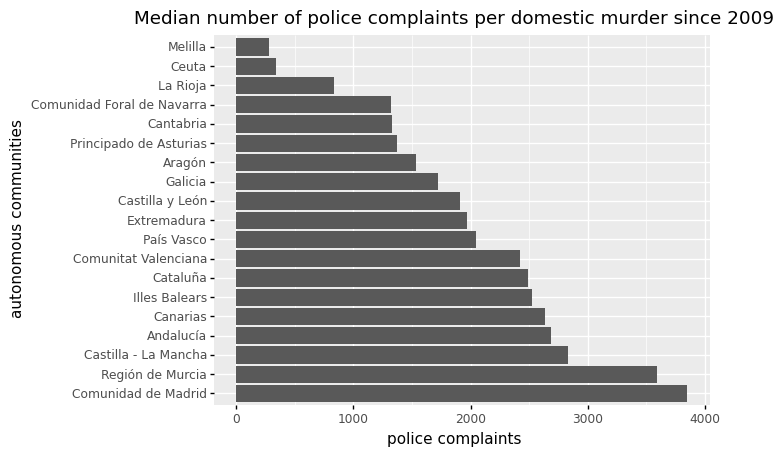

<ggplot: (308923810)>

In [42]:
(
    ggplot(df_median)
    + aes(x='reorder(autonomous_community, -complaints_per_murder)', y='complaints_per_murder')
    + geom_bar(stat='identity')
    + coord_flip()
     + labs(
         title = "Median number of police complaints per domestic murder since 2009",
         y = "police complaints",
         x = "autonomous communities"
     )
)